# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [72]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float

from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


In [74]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_ubyte(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

[[161 161 161 ..., 158 158 155]
 [161 160 161 ..., 152 151 149]
 [161 160 160 ..., 144 143 140]
 ..., 
 [ 50  50  50 ...,  91  94  96]
 [ 49  49  50 ...,  94  96  98]
 [ 49  49  49 ...,  96  97  99]]


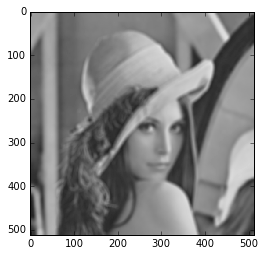

In [75]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean

avg = mean(lena_im, disk(5))
print avg
io.imshow(avg)

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

[[ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]
 [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]]


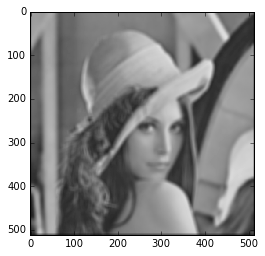

In [83]:
from scipy import ndimage
mask= []
disk_size = 5


mask = np.ones((2*disk_size,2*disk_size))
for i in range(0,2*disk_size):
    for j in range(0, 2*disk_size):
        mask[i][j] = (1./(4*disk_size * disk_size))        
        j = j + 1
    i = i + 1
    
print mask

res = ndimage.convolve(lena_im, mask, mode='constant', cval=0.0)
io.imshow(res,cmap="gray")

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [42]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

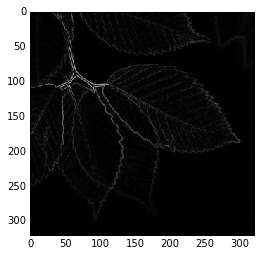

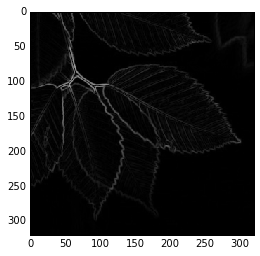

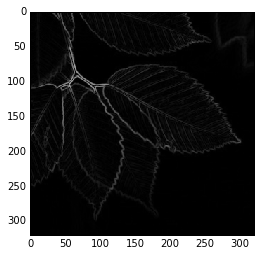

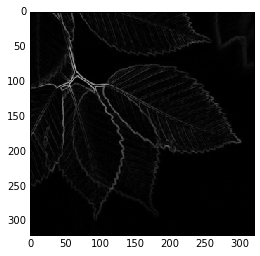

In [62]:
Path = './images/'
leaves_im = io.imread(Path.__add__('leaves.jpg'), flatten=True)

leaves_im = img_as_ubyte(leaves_im)
res_rob = filters.roberts(leaves_im)
io.imshow(res_rob)
plt.figure()
res_prew = filters.prewitt(leaves_im)
io.imshow(res_prew)
plt.figure()
res_sob = filters.sobel(leaves_im)
io.imshow(res_sob)
plt.figure()
res_sch = filters.scharr(leaves_im)
io.imshow(res_sch)

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

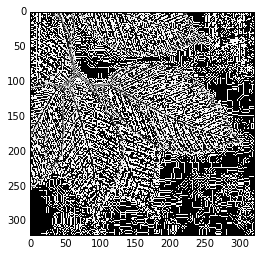

In [65]:
plt.figure()
res_laplace = ndimage.filters.laplace(leaves_im)
io.imshow(res_laplace)

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [85]:
from skimage import util

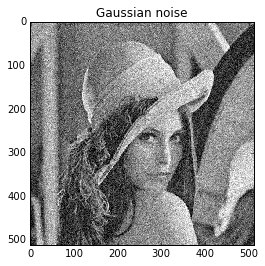

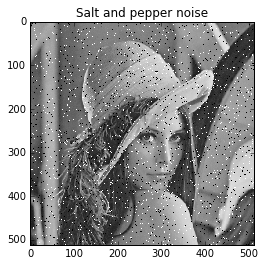

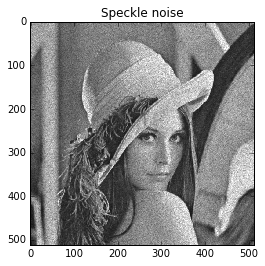

In [86]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

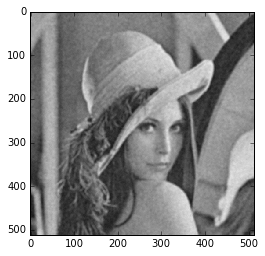

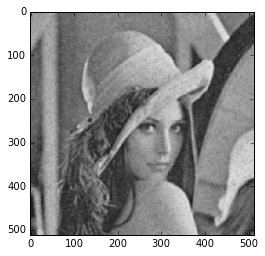

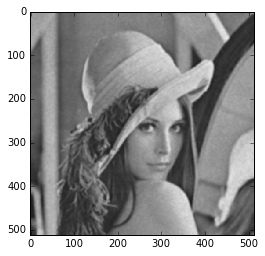

In [104]:
avg_lena_gauss = mean(lena_gaussian, disk(3))
io.imshow(avg_lena_gauss)
plt.figure()

avg_lena_sp = mean(lena_sp, disk(3))
io.imshow(avg_lena_sp)
plt.figure()

avg_lena_spck = mean(lena_speckle, disk(3))
io.imshow(avg_lena_spck)
plt.figure()

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

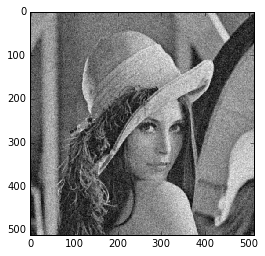

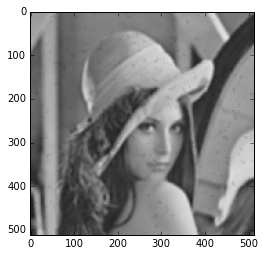

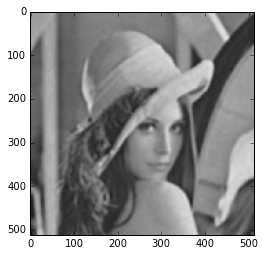

In [110]:
import skimage

alpha_lena_gauss = skimage.filters.rank.mean_percentile(lena_gaussian, disk(1),out=None, mask=None, shift_x=False, shift_y=False, p0=0.05, p1=0.95)
io.imshow(alpha_lena_gauss)
plt.figure()

alpha_lena_sp = skimage.filters.rank.mean_percentile(lena_sp, disk(5),out=None, mask=None, shift_x=False, shift_y=False, p0=0.05, p1=0.95)
io.imshow(alpha_lena_sp)
plt.figure()

alpha_lena_spck = skimage.filters.rank.mean_percentile(lena_speckle, disk(5),out=None, mask=None, shift_x=False, shift_y=False, p0=0.05, p1=0.95)
io.imshow(alpha_lena_spck)
plt.figure()

** median filter: **

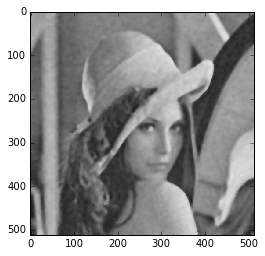

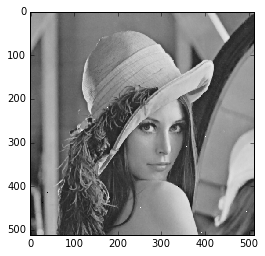

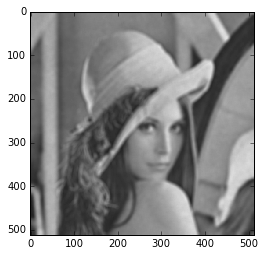

In [108]:
median_lena_gauss = skimage.filters.rank.median(lena_gaussian, disk(5))
io.imshow(median_lena_gauss)
plt.figure()

median_lena_sp = skimage.filters.rank.median(lena_sp, disk(1))
io.imshow(median_lena_sp)
plt.figure()

median_lena_spck = skimage.filters.rank.median(lena_speckle, disk(5))
io.imshow(alpha_lena_spck)
plt.figure()

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

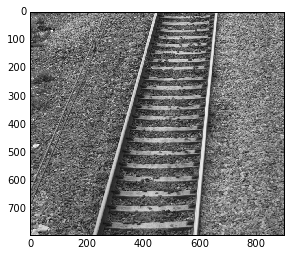

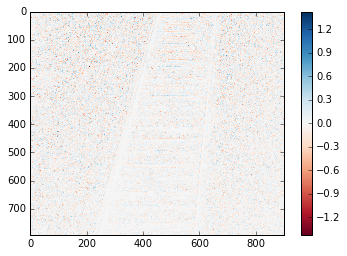

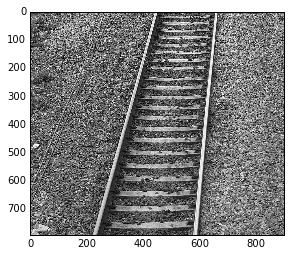

In [117]:
Path = './images/'
rail_im = io.imread(Path.__add__('railway.jpg'), flatten=True)

io.imshow(rail_im)
plt.figure()
res_rail_laplace = ndimage.filters.laplace(rail_im)
io.imshow(res_rail_laplace)
res_rail = rail_im - res_rail_laplace
plt.figure()
plt.imshow(res_rail, cmap="gray", vmin = 0., vmax = 1.)


## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

ValueError: too many values to unpack

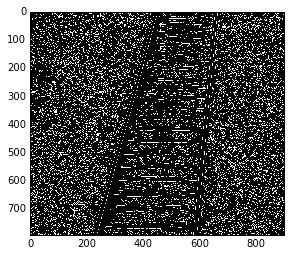

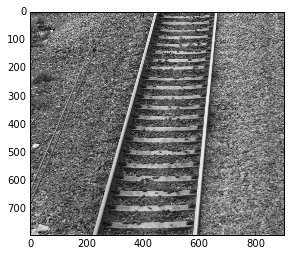

In [162]:
edges = canny(rail_im,2)
io.imshow(edges)

lines = probabilistic_hough_line(edges)
lines_h = hough_line(edges)
plt.figure()
cols, rows = rail_im.shape

plt.axis([0,rows,cols,0])
plt.imshow(rail_im, cmap= "gray")
for line in lines_h:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))
plt.show()